In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization

In [2]:
# Read in data
df = pd.read_csv('../Data/body_level_classification_train.csv')
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [3]:
df.nunique()

Gender                   2
Age                    993
Height                1113
Weight                1081
H_Cal_Consump            2
Veg_Consump            578
Water_Consump          894
Alcohol_Consump          4
Smoking                  2
Meal_Count             460
Food_Between_Meals       4
Fam_Hist                 2
H_Cal_Burn               2
Phys_Act               846
Time_E_Dev             785
Transport                5
Body_Level               4
dtype: int64

In [4]:
df.dtypes

Gender                 object
Age                   float64
Height                float64
Weight                float64
H_Cal_Consump          object
Veg_Consump           float64
Water_Consump         float64
Alcohol_Consump        object
Smoking                object
Meal_Count            float64
Food_Between_Meals     object
Fam_Hist               object
H_Cal_Burn             object
Phys_Act              float64
Time_E_Dev            float64
Transport              object
Body_Level             object
dtype: object

In [5]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1477 non-null   object 
 1   Age                 1477 non-null   float64
 2   Height              1477 non-null   float64
 3   Weight              1477 non-null   float64
 4   H_Cal_Consump       1477 non-null   object 
 5   Veg_Consump         1477 non-null   float64
 6   Water_Consump       1477 non-null   float64
 7   Alcohol_Consump     1477 non-null   object 
 8   Smoking             1477 non-null   object 
 9   Meal_Count          1477 non-null   float64
 10  Food_Between_Meals  1477 non-null   object 
 11  Fam_Hist            1477 non-null   object 
 12  H_Cal_Burn          1477 non-null   object 
 13  Phys_Act            1477 non-null   float64
 14  Time_E_Dev          1477 non-null   float64
 15  Transport           1477 non-null   object 
 16  Body_L

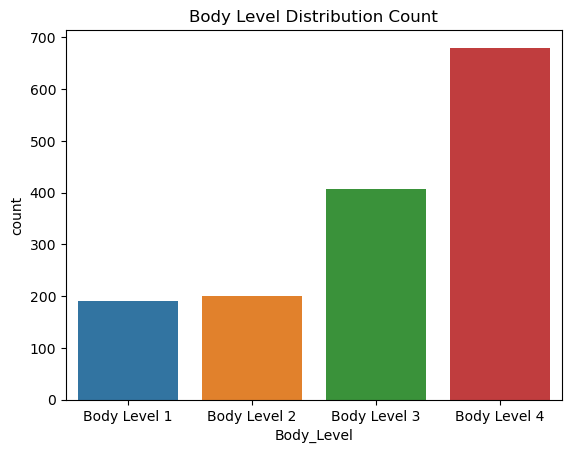

Body Level 4    0.460393
Body Level 3    0.274882
Body Level 2    0.136087
Body Level 1    0.128639
Name: Body_Level, dtype: float64

In [6]:
#  body level distribution 
sns.countplot(x='Body_Level', data=df)
plt.title('Body Level Distribution Count')
plt.show()
df['Body_Level'].value_counts(normalize=True)
# need to balance the data

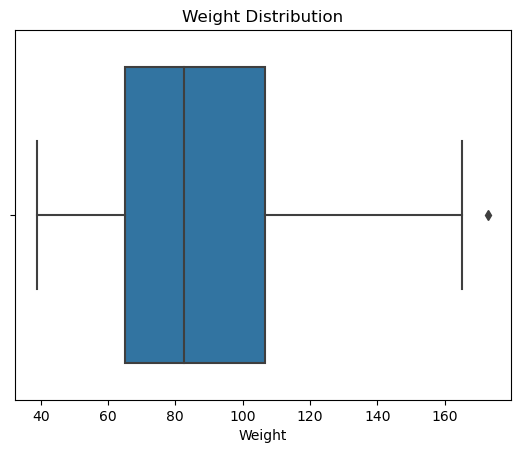

In [7]:
# show the outliers of weight
sns.boxplot(x=df['Weight'])
plt.title('Weight Distribution')
plt.show()

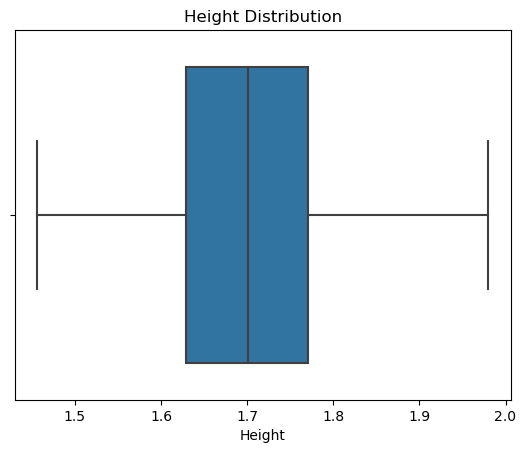

In [8]:
sns.boxplot(x=df['Height'])
plt.title('Height Distribution')
plt.show()

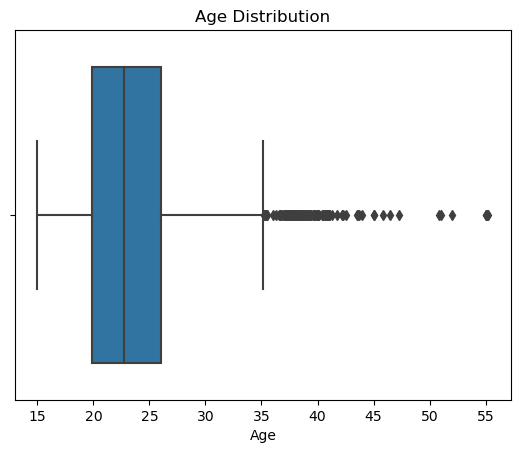

In [9]:
sns.boxplot(x=df['Age'])
plt.title('Age Distribution')
plt.show()
# There are outliers in age

In [10]:
print('Count of ages over 35: ', len(df[df['Age'] > 35]))

Count of ages over 35:  120


## preprocessing 

In [11]:
## Need to remove outliers ?? 
# sns.boxplot(x=df['Age'])
# plt.title('Age Distribution')
# plt.show()

In [12]:
# make array to save the columns that are not numeric
# non_numeric = []
# for column in df.columns:
#     if df[column].dtype == 'object':
#         non_numeric.append(column)
# # for each column in the non_numeric array, change the the unique values to numbers from 0 to n
# for column in non_numeric:
#     df[column] = pd.factorize(df[column])[0]

# make the categorical columns into one hot encoding
categorical_cols = ['Gender','H_Cal_Consump','Alcohol_Consump','Smoking','Food_Between_Meals','Fam_Hist','H_Cal_Burn','Transport']
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
df = encode_categorical(df)
df.head()

,Age,Height,Weight,Veg_Consump,Water_Consump,Meal_Count,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,...,Food_Between_Meals_no,Fam_Hist_no,Fam_Hist_yes,H_Cal_Burn_no,H_Cal_Burn_yes,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,22.547298,1.722461,51.881263,2.663421,1.041110,3.000000,0.794402,1.391948,Body Level 1,1,...,0,0,1,1,0,0,0,0,1,0
1,19.799054,1.743702,54.927529,2.000000,2.847264,3.289260,1.680844,2.000000,Body Level 1,0,...,0,0,1,1,0,0,0,0,1,0
2,17.823438,1.708406,50.000000,1.642241,1.099231,3.452590,0.418875,1.000000,Body Level 1,1,...,0,1,0,1,0,0,0,0,1,0
3,19.007177,1.690727,49.895716,1.212908,1.029703,3.207071,2.000000,1.000000,Body Level 1,1,...,0,1,0,1,0,0,0,0,1,0
4,19.729250,1.793315,58.195150,2.508835,2.076933,3.435905,2.026668,1.443328,Body Level 1,0,...,0,0,1,1,0,1,0,0,0,0


In [13]:
# Gender                   2
# H_Cal_Consump            2
# Alcohol_Consump          4
# Smoking                  2
# Food_Between_Meals       4
# Fam_Hist                 2
# H_Cal_Burn               2
# Transport                5
# Body_Level               4
# will writ comments to show the meaning of numbers in the columns that are not numeric
# gender : female 0 and male 1
# H_Cal_Consump : yes 0 and no 1
# Alcohol_Consump : no 0, sometimes 1, frequently 2, always 3
# Smoking : no 0 and yes 1
# Food_Between_Meals : frequently 0, sometimes 1, no 2, always 3
# Fam_Hist : yes 0 and no 1
# H_Cal_Burn : no 0 and yes 1
# Transport : public 0, automobile 1, walking 2, bike 3, motorbike 4
# Body_Level : BL1 0, BL2 1, BL3 2, BL4 3


C:\Users\ahmed\AppData\Local\Temp\ipykernel_11636\1764297774.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.corr()


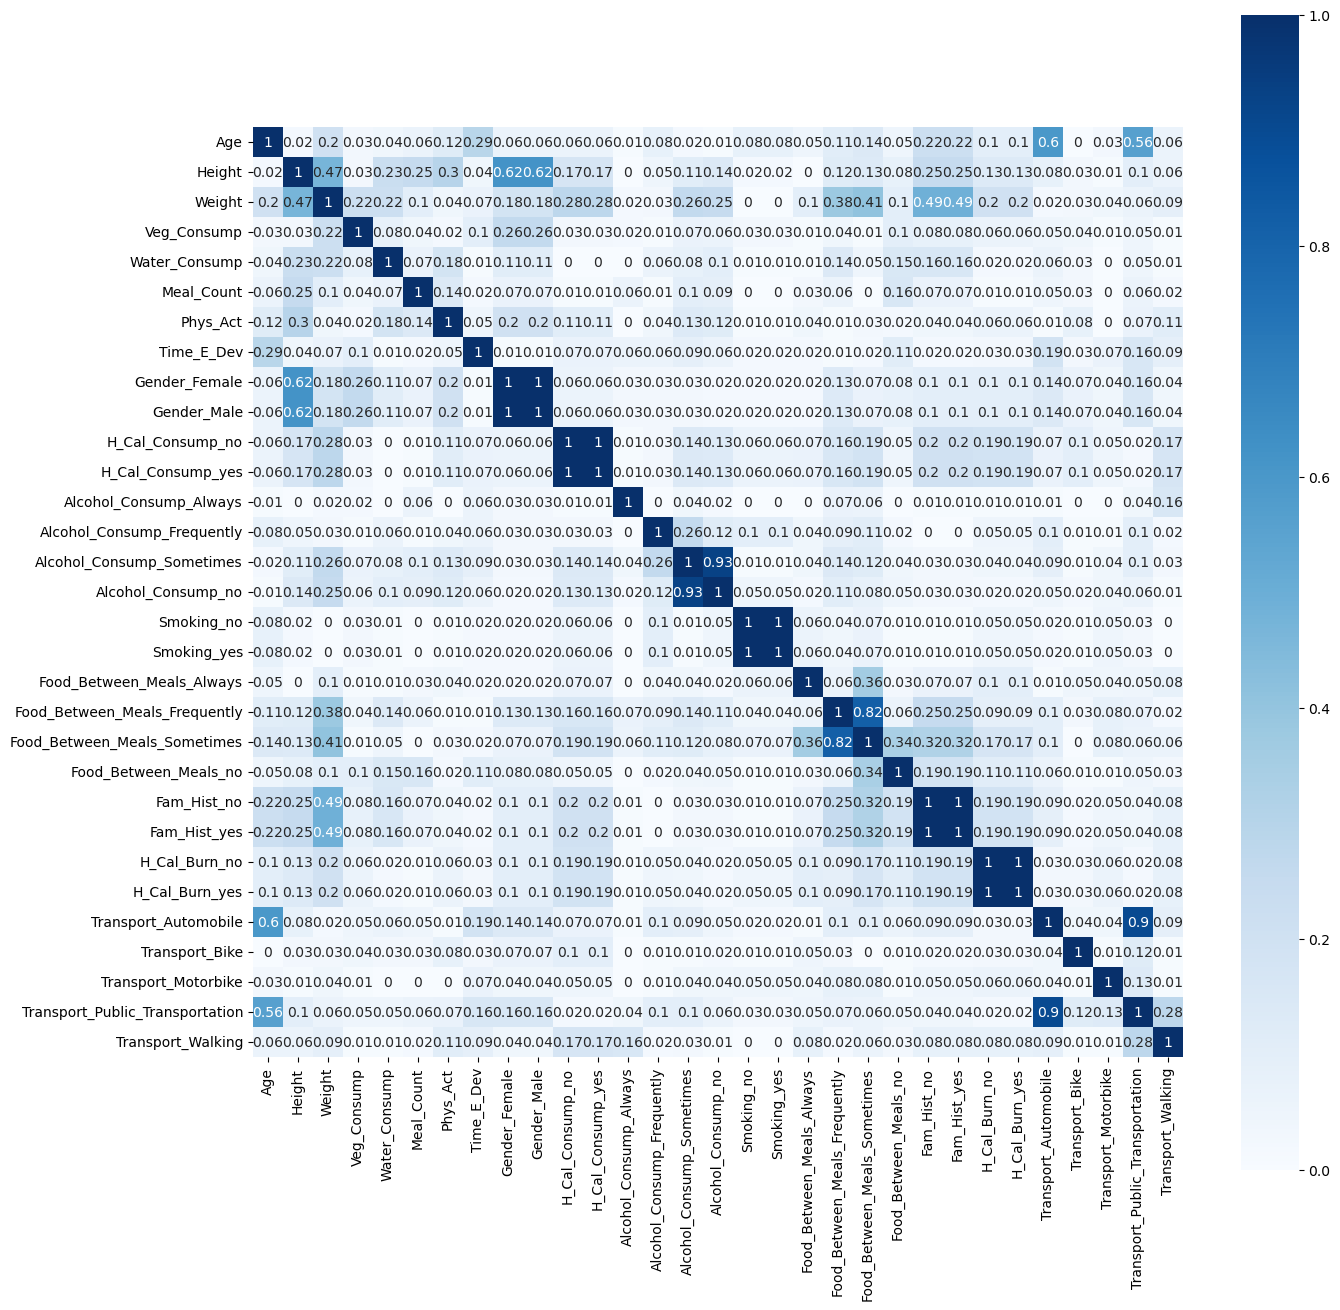

In [14]:
# print the covariance matrix of the data and visualize it
covariance_matrix = df.corr()
covariance_matrix
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(np.round(covariance_matrix, 2)), square=True, annot=True, cmap=plt.cm.Blues)
plt.show()


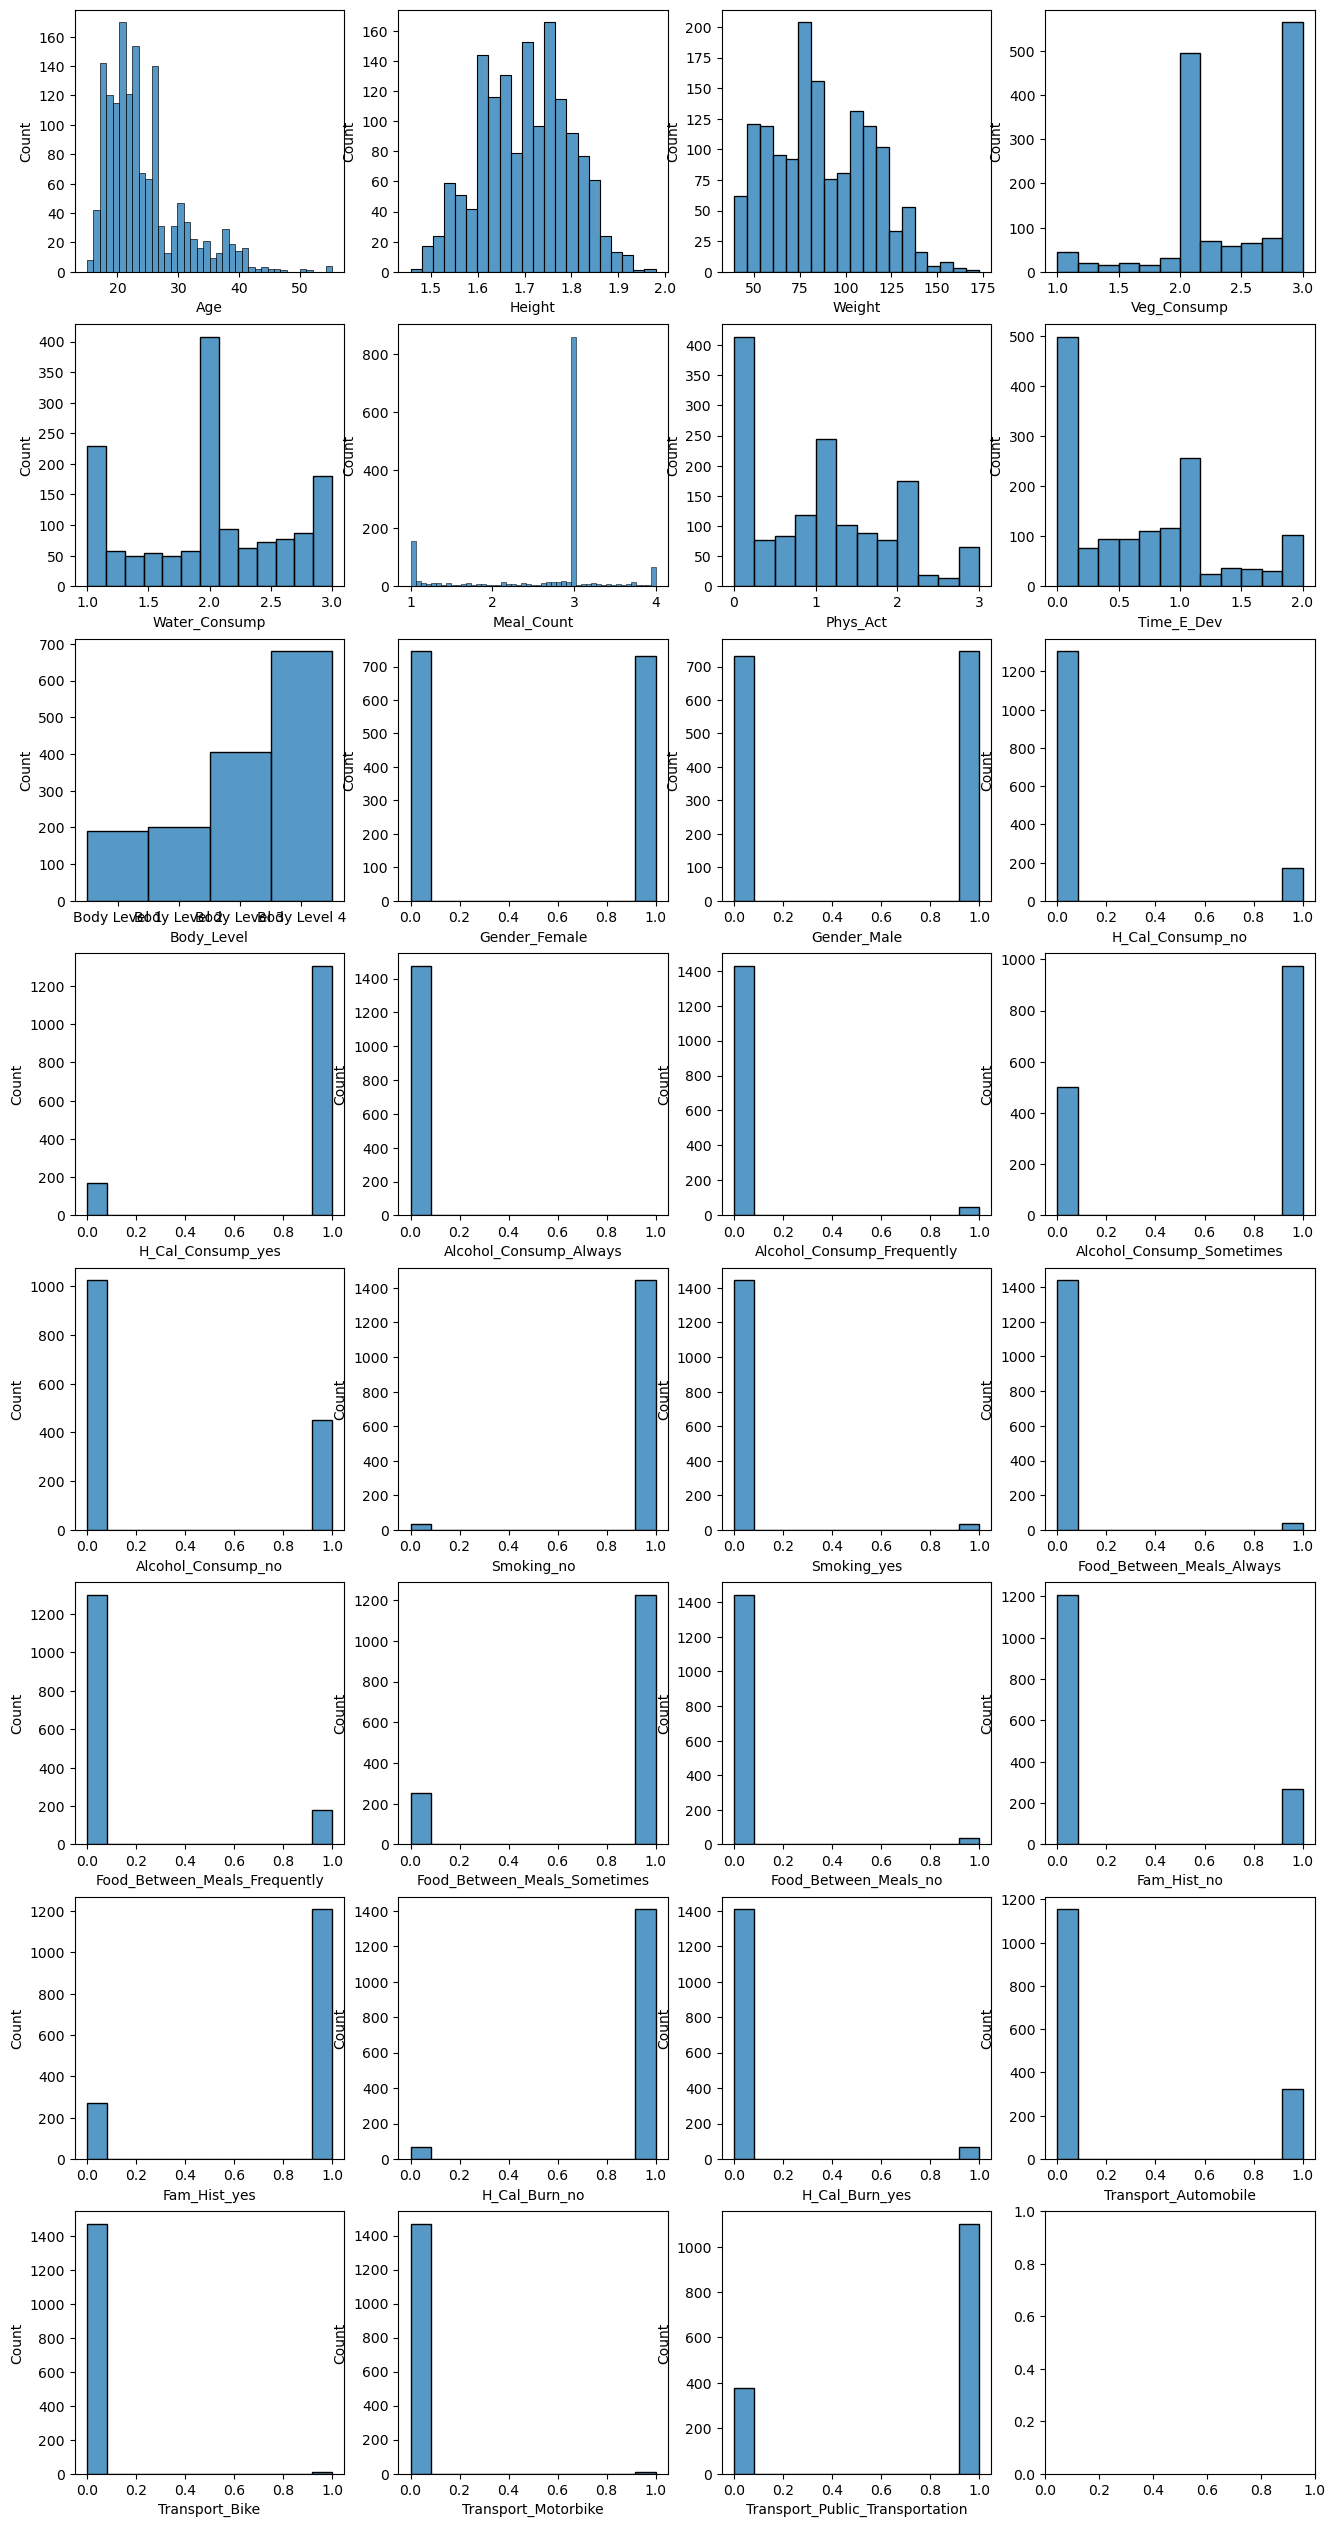

In [15]:
# Calculate the number of rows and columns needed
num_features = df.shape[1] - 1
num_rows = (num_features - 1) // 4 + 1
num_cols = min(num_features, 4)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 4*num_rows))

# Plot the distributions using nested for loops
for row in range(num_rows):
    for col in range(num_cols):
        feature_index = row * 4 + col
        if feature_index < num_features:
            ax = axs[row, col]
            sns.histplot(df.iloc[:, feature_index], ax=ax)

## test before oversampling

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
# the target is Body_Level
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create an LogisticRegression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# classification report
print(classification_report(y_test, y_pred))


# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy of logistic regression classifier on test set: 0.83
              precision    recall  f1-score   support

Body Level 1       0.80      0.90      0.85        31
Body Level 2       0.76      0.56      0.64        45
Body Level 3       0.73      0.80      0.76        82
Body Level 4       0.92      0.91      0.92       138

    accuracy                           0.83       296
   macro avg       0.80      0.79      0.79       296
weighted avg       0.83      0.83      0.82       296

Confusion Matrix:
[[ 28   3   0   0]
 [  7  25  13   0]
 [  0   5  66  11]
 [  0   0  12 126]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Balance the data using Over-sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(X,y)

df_ROS = pd.concat([X_train, y_train], axis=1)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_11636\1918944098.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df_ROS.corr()


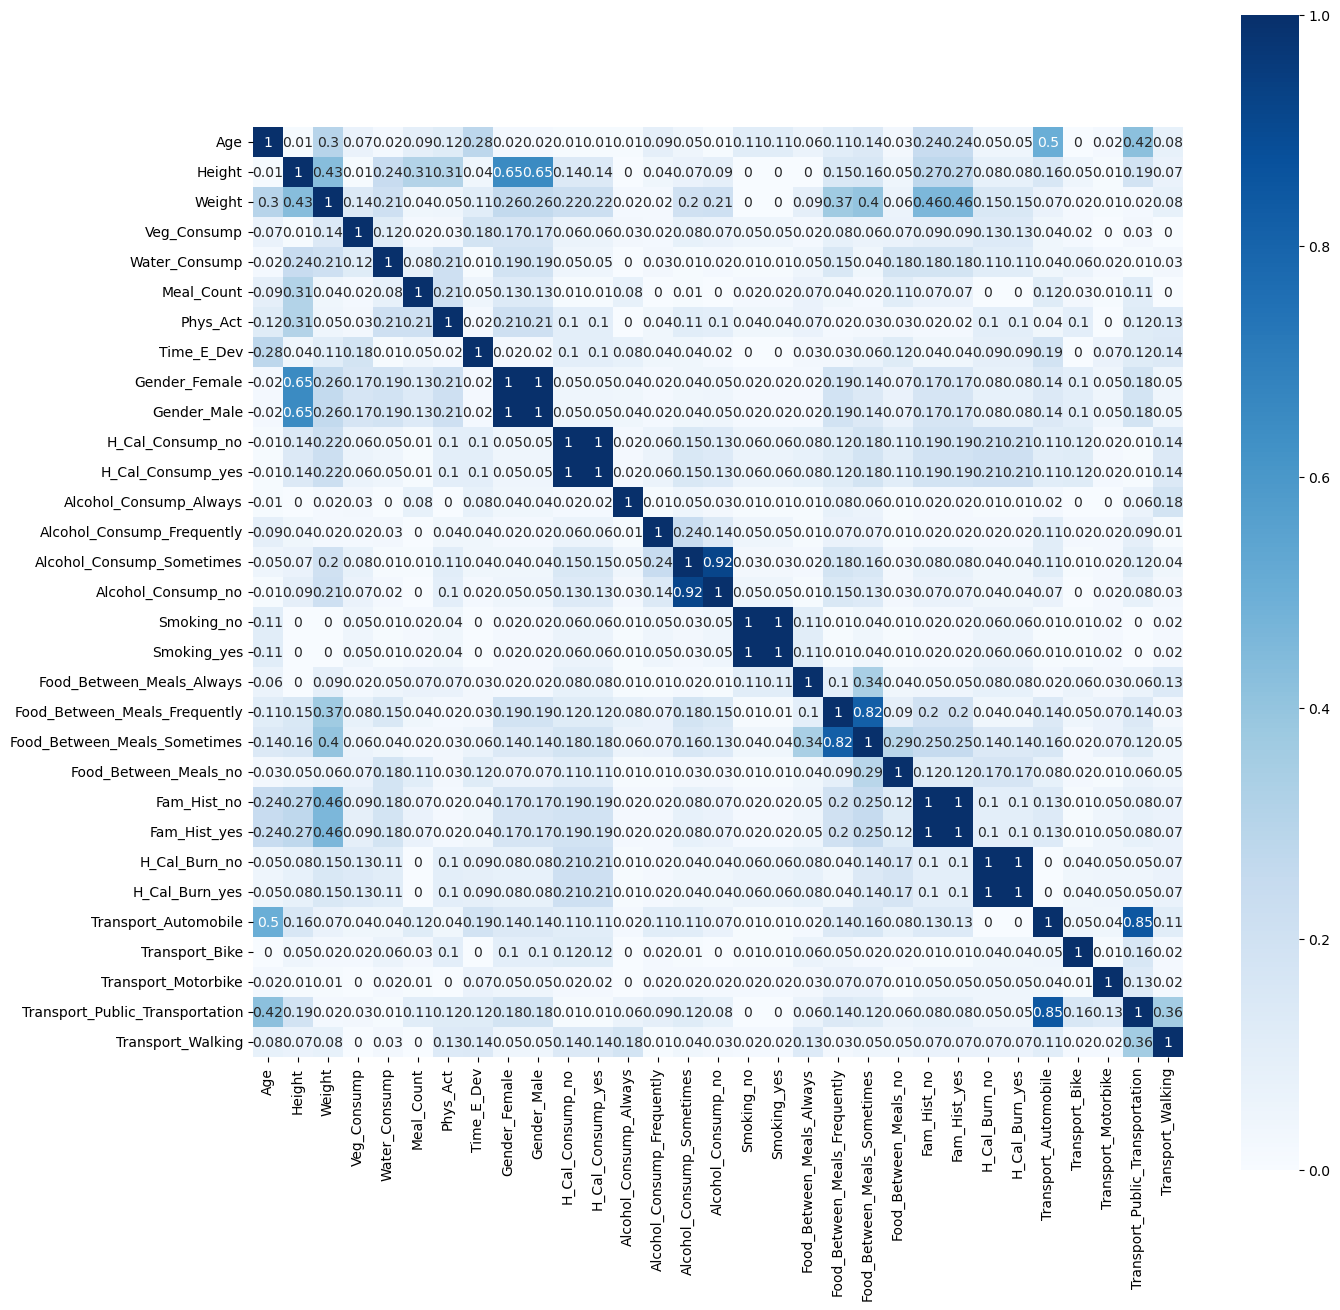

In [21]:
# print the covariance matrix of the data and visualize it
covariance_matrix = df_ROS.corr()
covariance_matrix
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(np.round(covariance_matrix, 2)), square=True, annot=True, cmap=plt.cm.Blues)
plt.show()

# save features and labels

In [22]:
df_ROS.to_csv('../Data/preprocessedDataROS.csv', index=False)

In [23]:
from imblearn.over_sampling import SMOTE

# The target is Body_Level
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the original and resampled data
print("Original data:")
print(X)
print(y)
print("Resampled data:")
print(X_resampled)
print(y_resampled)


Original data:
            Age    Height      Weight  Veg_Consump  Water_Consump  Meal_Count  \
0     22.547298  1.722461   51.881263     2.663421       1.041110    3.000000   
1     19.799054  1.743702   54.927529     2.000000       2.847264    3.289260   
2     17.823438  1.708406   50.000000     1.642241       1.099231    3.452590   
3     19.007177  1.690727   49.895716     1.212908       1.029703    3.207071   
4     19.729250  1.793315   58.195150     2.508835       2.076933    3.435905   
...         ...       ...         ...          ...            ...         ...   
1472  26.774115  1.755938  112.287678     1.428289       2.117733    3.000000   
1473  20.908785  1.700996  126.490236     3.000000       1.242832    3.000000   
1474  26.000000  1.629191  104.826776     3.000000       2.654702    3.000000   
1475  25.982261  1.629225  104.838425     3.000000       2.556068    3.000000   
1476  23.000000  1.774644  105.966894     2.312825       2.073497    3.000000   

      Phys_A

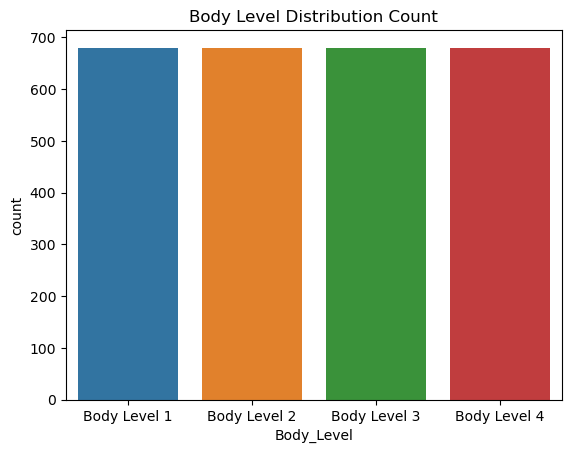

Body Level 1    0.25
Body Level 2    0.25
Body Level 3    0.25
Body Level 4    0.25
Name: Body_Level, dtype: float64

In [24]:
df_SMOTE = pd.concat([X_resampled, y_resampled], axis=1)
sns.countplot(x='Body_Level', data=df_SMOTE)
plt.title('Body Level Distribution Count')
plt.show()
df_SMOTE['Body_Level'].value_counts(normalize=True)


In [25]:
df_SMOTE.to_csv('../Data/preprocessedDataSMOTE.csv', index=False)